In [1]:
from analytics import *
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Timestamp Analyses:

## nsp1016_448_cs1.3

- Training on CS1
- LOF on 1 ThetaGPU node
- 160 MD Runs (1 per GPU on 20 ThetaGPU nodes)

In [2]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': '.15',
          'axes.facecolor': (0, 0, 0, 0),
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
       

Parsing CS1 training log: /projects/RL-fold/msalim/production-runs/pasc/nsp1016_448_cs1.3/cs1_run.log
Scanning md_runs for start/end times (this takes a while...)


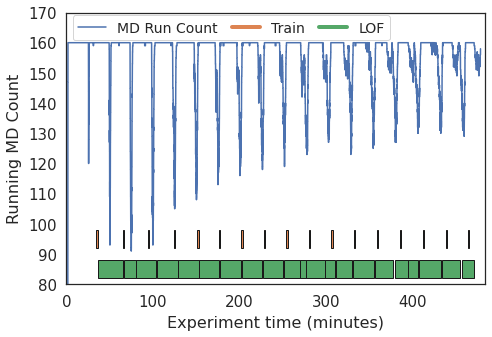

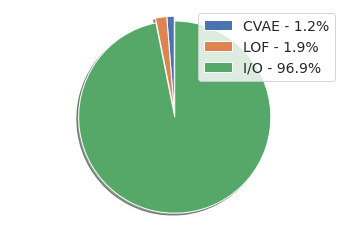

In [3]:
experiment_timeline("/projects/RL-fold/msalim/production-runs/pasc/nsp1016_448_cs1.3/", y_range=90, top_pad=10)
save_fig('timeline_nsp1016_448_cs1.3')
draw_lof_profile("/projects/RL-fold/msalim/production-runs/pasc/nsp1016_448_cs1.3/")
save_fig('lof_profile_nsp1016_448_cs1.3')

## nsp1016_448_gpu.1

- Training on 1 GPU node
- LOF on 1 ThetaGPU node
- 152 MD Runs (1 per GPU on 19 ThetaGPU nodes)

Parsing GPU training log: /projects/RL-fold/msalim/production-runs/pasc/nsp1016_448_gpu.1/training.log
Scanning md_runs for start/end times (this takes a while...)


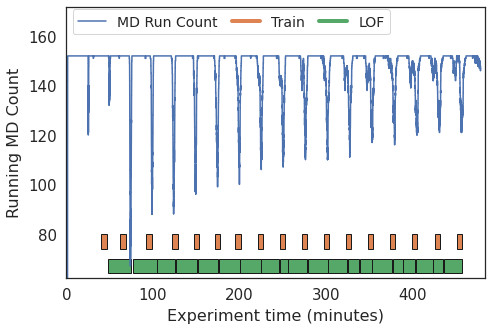

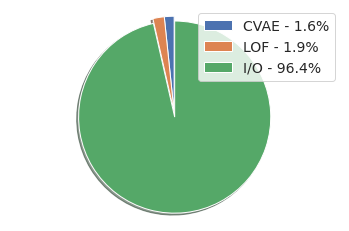

In [4]:
experiment_timeline("/projects/RL-fold/msalim/production-runs/pasc/nsp1016_448_gpu.1/", y_range=110, top_pad=20)
save_fig("timeline_nsp1016-448_gpu.1")
draw_lof_profile("/projects/RL-fold/msalim/production-runs/pasc/nsp1016_448_gpu.1/")
save_fig("lof_profile_nsp1016-448_gpu.1")

## nsp1016_448_gpu.2

- Training on 4 GPU nodes
- LOF on 1 ThetaGPU node
- 128 MD Runs (1 per GPU on 16 ThetaGPU nodes)

Parsing GPU training log: /projects/RL-fold/msalim/production-runs/pasc/nsp1016_448_gpu.2/training.log
Scanning md_runs for start/end times (this takes a while...)


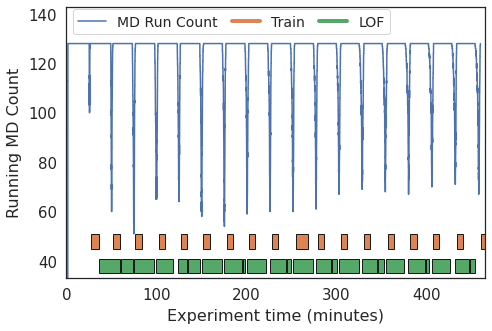

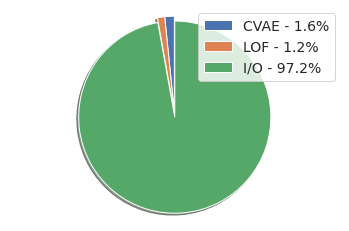

In [5]:
experiment_timeline("/projects/RL-fold/msalim/production-runs/pasc/nsp1016_448_gpu.2/", y_range=110, top_pad=15)
save_fig("timeline_nsp1016-448_gpu.2")
draw_lof_profile("/projects/RL-fold/msalim/production-runs/pasc/nsp1016_448_gpu.2/")
save_fig("lof_profile_nsp1016-448_gpu.2")

## bba_28_gpu.1

- Training on 1 GPU nodes
- LOF on 1 ThetaGPU node
- 152 MD Runs (1 per GPU on 19 ThetaGPU nodes)

Parsing GPU training log: /projects/RL-fold/msalim/production-runs/pasc/bba_28_gpu.1/training.log
Scanning md_runs for start/end times (this takes a while...)


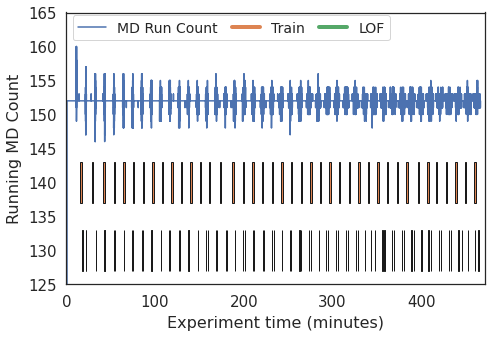

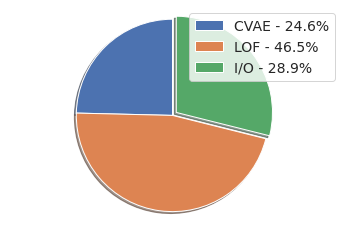

In [6]:
experiment_timeline("/projects/RL-fold/msalim/production-runs/pasc/bba_28_gpu.1/", y_range=40)
save_fig("timeline_bba_28_gpu.1")
draw_lof_profile("/projects/RL-fold/msalim/production-runs/pasc/bba_28_gpu.1/")
save_fig("lof_profile_bba_28_gpu.1")

# Learning Curve Analysis

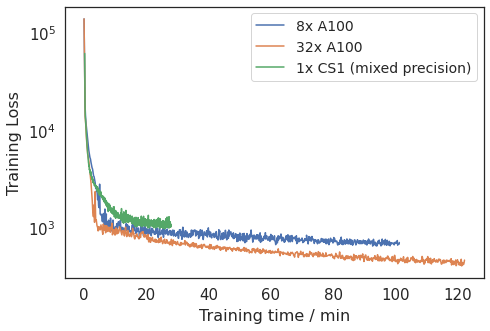

In [7]:
p = Path("/projects/RL-fold/msalim/production-runs/pasc/")
paths = [p/"nsp1016_448_gpu.1", p/"nsp1016_448_gpu.2", p/"nsp1016_448_cs1.3"]
labels = ["8x A100", "32x A100", "1x CS1 (mixed precision)"]
plot_losses(paths, labels=labels,  as_time=True)
save_fig("learning_curves_nsp1016")

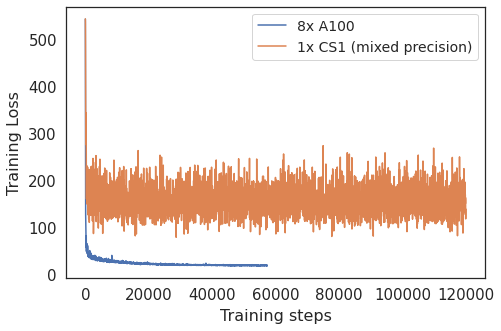

In [8]:
p = Path("/projects/RL-fold/msalim/production-runs/pasc/")
paths = [p/"bba_28_gpu.1", p/"bba_28_cs1.1"]
labels = ["8x A100", "1x CS1 (mixed precision)"]
plot_losses(paths, labels=labels, as_time=False, log_scale=False)
save_fig("learning_curves_bba")

# Conformational Sampling Analysis:

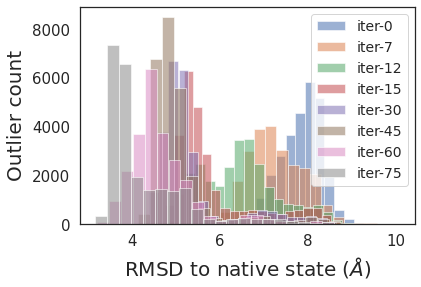

In [9]:
p = Path("/projects/RL-fold/msalim/production-runs/pasc/")
paths = [p/"bba_28_cs1.1"]
xlabel = r"RMSD to native state $(\AA)$"
ylabel = "Outlier count"
iterations = list(range(0, 82, 15)) + [7, 12]
plot_conformational_sampling(paths, iterations, xlabel, ylabel)

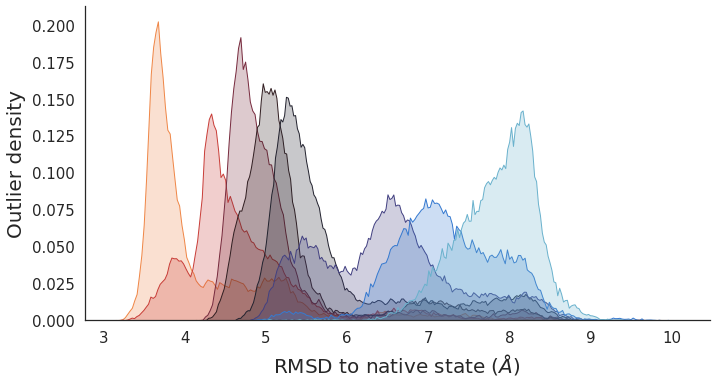

In [10]:
p = Path("/projects/RL-fold/msalim/production-runs/pasc/")
paths = [p/"bba_28_cs1.1"]
xlabel = r"RMSD to native state $(\AA)$"
ylabel = "Outlier density"
iterations = list(range(0, 82, 15)) + [7, 12]
labels=[f"Iteration {i}" for i in sorted(iterations)]
kde_conformational_sampling(paths, iterations, labels=labels, xlabel=xlabel, ylabel=ylabel, aspect=2.0)
save_fig("rmsd_kdes_bba_28_cs1.1")

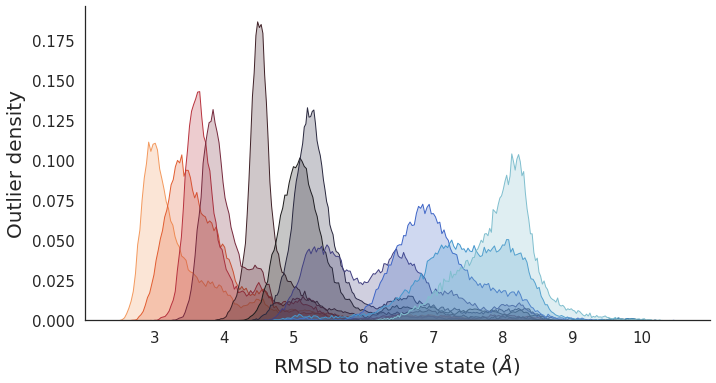

In [11]:
p = Path("/projects/RL-fold/msalim/production-runs/pasc/")
paths = [p/"bba_28_cs1.2"]
xlabel = r"RMSD to native state $(\AA)$"
ylabel = "Outlier density"
#iterations = list(range(0, 178, 15))
iterations = list(range(0, 30, 5)) + [60, 90, 120, 150, 178] 
labels=[f"Iteration {i}" for i in sorted(iterations)]
kde_conformational_sampling(paths, iterations, labels=labels, xlabel=xlabel, ylabel=ylabel, aspect=2.0)
save_fig("rmsd_kdes_bba_28_cs1.2")

/projects/RL-fold/msalim/production-runs/pasc/bba_28_gpu.1
77
/projects/RL-fold/msalim/production-runs/pasc/bba_28_cs1.1
82


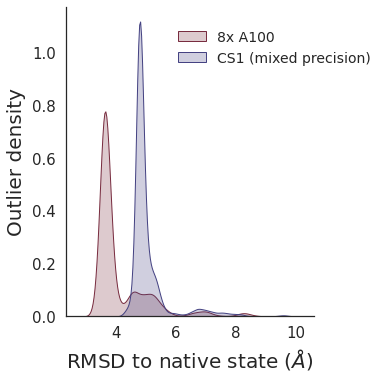

In [17]:
p = Path("/projects/RL-fold/msalim/production-runs/pasc/")
paths = [p/"bba_28_gpu.1", p/"bba_28_cs1.1"]
xlabel = r"RMSD to native state $(\AA)$"
ylabel = "Outlier density"
labels = ["8x A100", "CS1 (mixed precision)"]
kde_run_comparison(paths, iteration=-1, labels=labels, xlabel=xlabel, ylabel=ylabel, legend_pos=(0.75, 0.85))
save_fig("BBA_gpu_vs_cs1")